## Trazer os dados das tabelas do banco de dados para DataFrames
Começo Trazendo os dados das tabelas do banco de dados para DataFrames

In [ ]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

# Carregar variáveis do arquivo .env
load_dotenv()

# Pegar as credenciais do arquivo .env
db_host = os.getenv('DB_HOST')
db_database = os.getenv('DB_DATABASE')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_port = os.getenv('DB_PORT')

# Conectar ao banco de dados PostgreSQL usando as variáveis do .env
conn = psycopg2.connect(
    host=db_host,
    database=db_database,
    user=db_user,
    password=db_password,
    port=db_port
)

# Função para trazer os dados de uma tabela e convertê-los em DataFrame
def tabela_para_dataframe(tabela):
    query = f"SELECT * FROM {tabela}"
    return pd.read_sql(query, conn)

# Trazer os dados das tabelas atendimento, unidadeSaude, paciente e profissionalSaude
df_atendimentos = tabela_para_dataframe('atendimento')
df_unidade = tabela_para_dataframe('unidadeSaude')
df_paciente = tabela_para_dataframe('paciente')
df_profissional = tabela_para_dataframe('profissionalSaude')


In [ ]:

# Exibir os primeiros registros do DataFrame de atendimentos para validação
df_atendimentos.head(10)


In [ ]:
# Exibir informações dos DataFrames
print("Atendimentos:")
df_atendimentos.describe()


In [ ]:

print("\nUnidades de Saúde:")
df_unidade.info()


In [ ]:

print("\nPacientes:")
df_paciente.info()

print("\nProfissionais de Saúde:")
df_profissional.info()


### Preparando os dados para o agrupamento
Crie um data frame para cada agrupamento que desejo fazer as previsoes

In [ ]:
# Converter a coluna data_hora_atendimento para datetime, se necessário
df_atendimentos['data_hora_atendimento'] = pd.to_datetime(df_atendimentos['data_hora_atendimento'])

# Agrupamento Diário
df_diario = df_atendimentos.groupby(df_atendimentos['data_hora_atendimento'].dt.date).size().reset_index(name='num_atendimentos_diarios')

# Agrupamento Semanal
df_semanal = df_atendimentos.groupby(df_atendimentos['data_hora_atendimento'].dt.to_period('W')).size().reset_index(name='num_atendimentos_semanal')

# Agrupamento Mensal
df_mensal = df_atendimentos.groupby(df_atendimentos['data_hora_atendimento'].dt.to_period('M')).size().reset_index(name='num_atendimentos_mensal')

# Exibir os primeiros resultados para validação
print("Atendimentos Diários:")
print(df_diario.head())

print("\nAtendimentos Semanais:")
print(df_semanal.head())

print("\nAtendimentos Mensais:")
print(df_mensal.head())


<Axes: title={'center': 'Atendimentos Diários'}, xlabel='data_hora_atendimento', ylabel='Número de Atendimentos'>

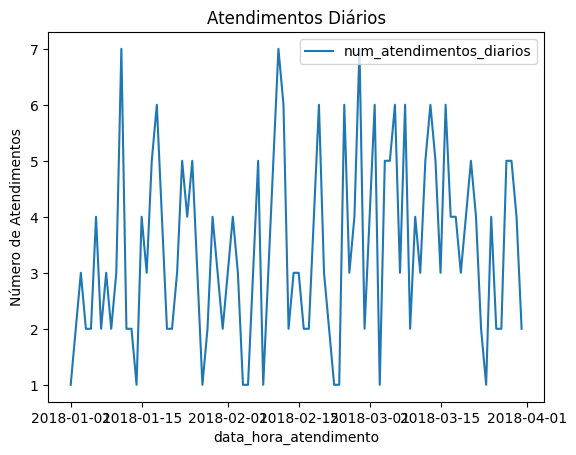

In [9]:
# Exibir as primeiras linhas do agrupamento diário
df_diario.head()

# Visualizar os atendimentos diários
df_diario.plot(x='data_hora_atendimento', y='num_atendimentos_diarios', title='Atendimentos Diários', ylabel='Número de Atendimentos')


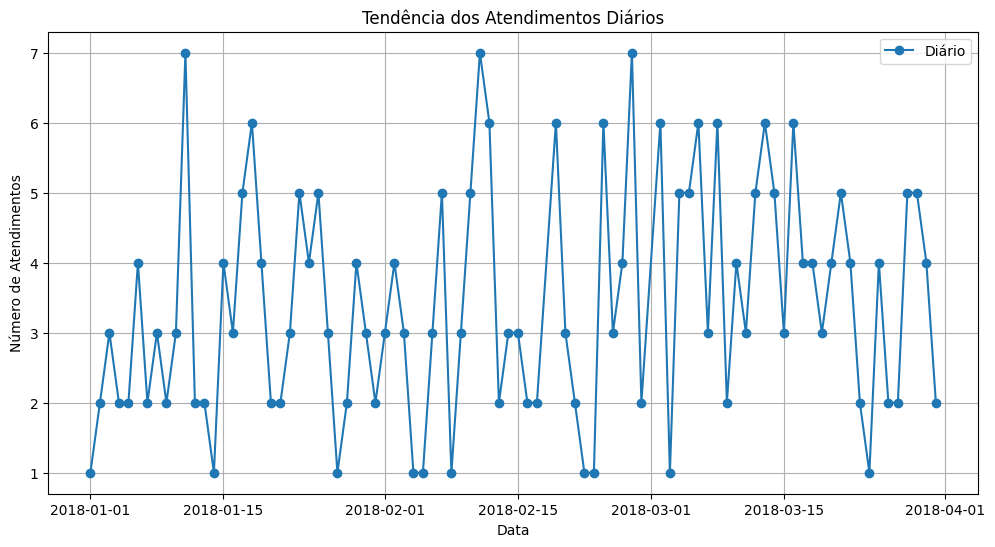

In [11]:
import matplotlib.pyplot as plt

# Gráfico de tendência dos atendimentos diários
plt.figure(figsize=(12, 6))
plt.plot(df_diario['data_hora_atendimento'], df_diario['num_atendimentos_diarios'], marker='o', linestyle='-', label='Diário')
plt.title('Tendência dos Atendimentos Diários')
plt.xlabel('Data')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.grid(True)
plt.show()


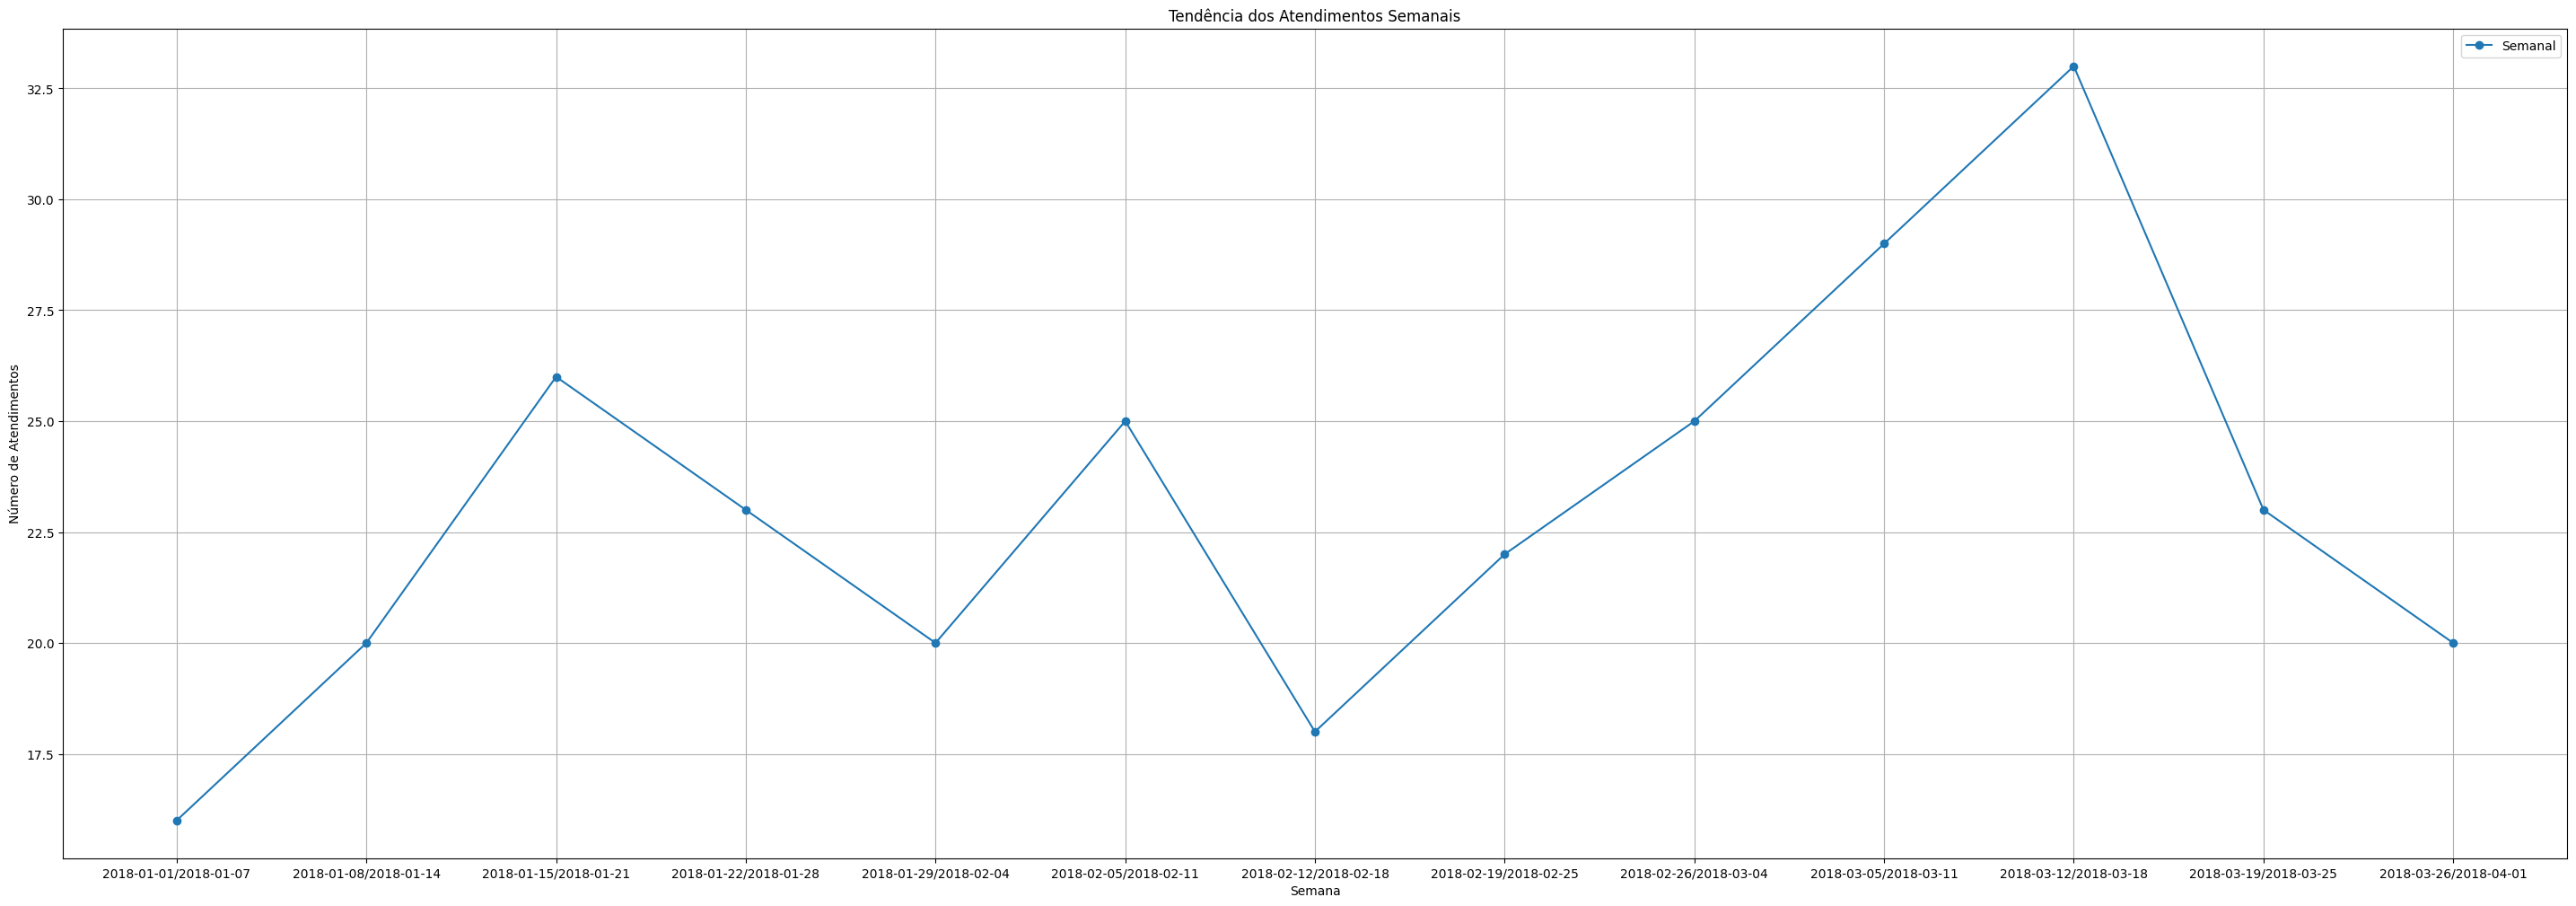

In [15]:

# Gráfico de tendência dos atendimentos semanais
plt.figure(figsize=(36, 12))
plt.plot(df_semanal['data_hora_atendimento'].astype(str), df_semanal['num_atendimentos_semanal'], marker='o', linestyle='-', label='Semanal')
plt.title('Tendência dos Atendimentos Semanais')
plt.xlabel('Semana')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.grid(True)
plt.show()


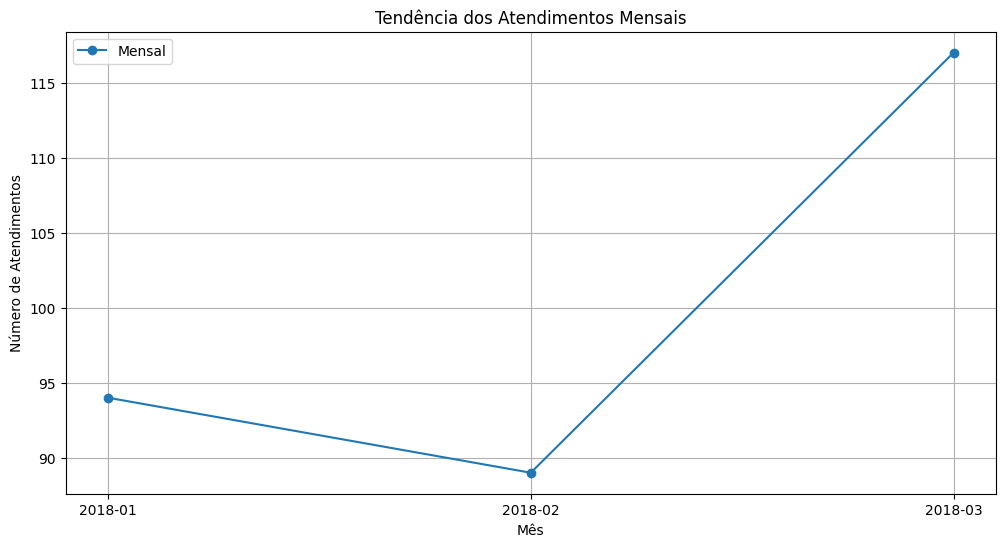

In [13]:

# Gráfico de tendência dos atendimentos mensais
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora_atendimento'].astype(str), df_mensal['num_atendimentos_mensal'], marker='o', linestyle='-', label='Mensal')
plt.title('Tendência dos Atendimentos Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.grid(True)
plt.show()

## DESAFIO: 
#### Tentar prever a demanda por bairro do paciente.

1. Juntar as tabelas: Precisamos unir os dados de atendimentos com os dados da tabela de pacientes, pois o bairro está armazenado nela.
2. Agrupar os atendimentos por bairro: Uma vez que os dados estejam unidos, podemos agrupar os atendimentos por bairro.
3. Preparar os dados para prever a demanda por bairro.